In [1]:
# See the dataset folder in linux-lab:
! ls /home/zulkar/Dropbox/gits/data/ThOpt/master/

master_06_09_2016_14_43  master_06_10_2016_18_27  readme.txt


In [2]:
# Control variables: 

# master dataset location:
master_location = 'Dropbox/gits/data/ThOpt/master/'

# master file name : 
master_file_name = 'master_06_10_2016_18_27'


In [3]:
# import pandas library:
import os
import pandas as pds
import pylab as pyl
import numpy as np
%matplotlib inline

In [4]:
# pretty dataframe :
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
# required values :

# OS file seperator: 
file_seperator = os.sep


# User OS home directory:
user_home = os.environ['HOME']
user_home = user_home+file_seperator
user_home

'/home/zulkar/'

In [36]:
# read the master file : 
full_master_file_path = user_home + master_location + master_file_name
data = pds.read_csv(full_master_file_path)
data.head()

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination
0,652486,3293,128,0.25,4194304,1,1,1,0,48.360560,42.371396,2015-07-24 00:05:45,Evenstar,Didclab-ws10
1,652486,3293,128,0.25,4194304,1,1,2,0,56.777687,36.089951,2015-07-24 00:06:27,Evenstar,Didclab-ws10
2,652486,3293,128,0.25,4194304,1,1,4,0,62.801374,32.628335,2015-07-24 00:07:03,Evenstar,Didclab-ws10
3,652486,3293,128,0.25,4194304,1,1,8,0,76.870653,26.656531,2015-07-24 00:07:36,Evenstar,Didclab-ws10
4,652486,3293,128,0.25,4194304,1,1,16,0,79.185026,25.877430,2015-07-24 00:08:03,Evenstar,Didclab-ws10


In [7]:
# as first five columns are data transfer requests. we can convert them into string for accurate and 
# efficient indexing. 

data['file_size'] = data['file_size'].astype(str)
data['number_of_files'] = data['number_of_files'].astype(str)
data['bandwidth'] = data['bandwidth'].astype(str)
data['rtt'] = data['rtt'].astype(str)
data['buffer_size'] = data['buffer_size'].astype(str)
data.head()

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination
0,652486,3293,128,0.25,4194304,1,1,1,0,48.360560,42.371396,2015-07-24 00:05:45,Evenstar,Didclab-ws10
1,652486,3293,128,0.25,4194304,1,1,2,0,56.777687,36.089951,2015-07-24 00:06:27,Evenstar,Didclab-ws10
2,652486,3293,128,0.25,4194304,1,1,4,0,62.801374,32.628335,2015-07-24 00:07:03,Evenstar,Didclab-ws10
3,652486,3293,128,0.25,4194304,1,1,8,0,76.870653,26.656531,2015-07-24 00:07:36,Evenstar,Didclab-ws10
4,652486,3293,128,0.25,4194304,1,1,16,0,79.185026,25.877430,2015-07-24 00:08:03,Evenstar,Didclab-ws10


In [64]:
# get the unique transfers : as tuple 
transfer_requests = data[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
droped_duplicate_trans_req = transfer_requests.drop_duplicates()

unique_transfers = [tuple(transfers) for transfers in droped_duplicate_trans_req.values]
unique_transfers[1:10]
#len(unique_transfers)

[(10623021.0, 405.0, 128.0, 0.25, 4194304.0),
 (51421866.0, 126.0, 128.0, 0.25, 4194304.0),
 (912680960.0, 10.0, 128.0, 0.25, 4194304.0),
 (3131997.0, 3429.0, 1280.0, 80.0, 33554432.0),
 (23727255.0, 906.0, 1280.0, 80.0, 33554432.0),
 (132236763.0, 325.0, 1280.0, 80.0, 33554432.0),
 (3063322383.0, 34.0, 1280.0, 80.0, 33554432.0),
 (5242929.0, 1000.0, 1280.0, 40.0, 33554432.0),
 (26214461.0, 200.0, 1280.0, 40.0, 33554432.0)]

In [ ]:
# make (file_size, number_of_files, bandwidth, rtt, buffer_size) index 
# d = data.set_index(['source','destination','start_time','file_size','number_of_files','bandwidth','rtt','buffer_size','p','cc','pp','fast'])
d = data.set_index(['source','destination'])
d.head()

In [10]:
r = data.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size'])
r.head()

p  cc  pp  fast  \
file_size number_of_files bandwidth rtt  buffer_size                    
652486    3293            128       0.25 4194304      1   1   1     0   
                                         4194304      1   1   2     0   
                                         4194304      1   1   4     0   
                                         4194304      1   1   8     0   
                                         4194304      1   1  16     0   

                                                      throughput       time  \
file_size number_of_files bandwidth rtt  buffer_size                          
652486    3293            128       0.25 4194304       48.360560  42.371396   
                                         4194304       56.777687  36.089951   
                                         4194304       62.801374  32.628335   
                                         4194304       76.870653  26.656531   
                                         4194304       79.185026  25.877430   

                                                               start_time  \
file_size number_of_files bandwidth rtt  buffer_size                        
652486    3293            128       0.25 4194304      2015-07-24 00:05:45   
                                         4194304      2015-07-24 00:06:27   
                                         4194304      2015-07-24 00:07:03   
                                         4194304      2015-07-24 00:07:36   
                                         4194304      2015-07-24 00:08:03   

                                                        source   destination  
file_size number_of_files bandwidth rtt  buffer_size                          
652486    3293            128       0.25 4194304      Evenstar  Didclab-ws10  
                                         4194304      Evenstar  Didclab-ws10  
                                         4194304      Evenstar  Didclab-ws10  
                                         4194304      Evenstar  Didclab-ws10  
                                         4194304      Evenstar  Didclab-ws10

In [18]:
h = r.loc[('209715259', '69', '1280', '39.0', '49920000')]
h.head()

/home/zulkar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


p  cc  pp  fast  \
file_size number_of_files bandwidth rtt  buffer_size                    
209715259 69              1280      39.0 49920000     1   1   1     0   
                                         49920000     1   1   1     1   
                                         49920000     1   1   2     0   
                                         49920000     1   1   2     1   
                                         49920000     1   1   4     0   

                                                      throughput        time  \
file_size number_of_files bandwidth rtt  buffer_size                           
209715259 69              1280      39.0 49920000      47.266001  291.964704   
                                         49920000      55.589452  248.248604   
                                         49920000      63.238233  218.222477   
                                         49920000      47.229179  292.192334   
                                         49920000      53.472254  258.077842   

                                                               start_time  \
file_size number_of_files bandwidth rtt  buffer_size                        
209715259 69              1280      39.0 49920000     2016-05-20 11:28:00   
                                         49920000     2016-05-20 11:32:00   
                                         49920000     2016-05-20 11:36:00   
                                         49920000     2016-05-20 11:41:00   
                                         49920000     2016-05-20 11:45:00   

                                                        source   destination  
file_size number_of_files bandwidth rtt  buffer_size                          
209715259 69              1280      39.0 49920000     Stampede  Gordon/Oasis  
                                         49920000     Stampede  Gordon/Oasis  
                                         49920000     Stampede  Gordon/Oasis  
                                         49920000     Stampede  Gordon/Oasis  
                                         49920000     Stampede  Gordon/Oasis

In [35]:
# filter specific columns from data:
h1 = r.loc[('104857668', '299', '1280', '39.0', '49920000')]
p1 = h1.sort_values('throughput')
p1.tail(4)

/home/zulkar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


p  cc  pp  fast  \
file_size number_of_files bandwidth rtt  buffer_size                     
104857668 299             1280      39.0 49920000      8  32   1     0   
                                         49920000     32  16   8     1   
                                         49920000      8  32   4     0   
                                         49920000     32  16   8     0   

                                                      throughput       time  \
file_size number_of_files bandwidth rtt  buffer_size                          
104857668 299             1280      39.0 49920000     731.041026  40.900604   
                                         49920000     739.935649  40.408946   
                                         49920000     746.124336  40.073776   
                                         49920000     780.620068  38.302909   

                                                               start_time  \
file_size number_of_files bandwidth rtt  buffer_size                        
104857668 299             1280      39.0 49920000     2016-05-23 17:43:00   
                                         49920000     2016-05-23 20:46:00   
                                         49920000     2016-05-23 17:45:00   
                                         49920000     2016-05-23 20:45:00   

                                                        source   destination  
file_size number_of_files bandwidth rtt  buffer_size                          
104857668 299             1280      39.0 49920000     Stampede  Gordon/Oasis  
                                         49920000     Stampede  Gordon/Oasis  
                                         49920000     Stampede  Gordon/Oasis  
                                         49920000     Stampede  Gordon/Oasis

# clustering data based on file requests:

In [45]:
# importing libraries:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [43]:
# some setting for this notebook to actually show the graphs inline, you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [92]:
# get the data:
unique_transfers[0:5]
# preprocessing : 
# normalization: all columns between 1 to 100: (x - x_min) / (x_max - x_min)

file_size_min = data.file_size.min() 
file_size_max = data.file_size.max()
number_of_files_min = data.number_of_files.min()
number_of_files_max = data.number_of_files.max()
bandwidth_max = data.bandwidth.max()
bandwidth_min = data.bandwidth.min()
rtt_min = data.rtt.min()
rtt_max = data.rtt.max()
buffer_size_min = data.buffer_size.min()
buffer_size_max = data.buffer_size.max()

unique_transfers[0:5]

droped_duplicate_trans_req.head()
#droped_duplicate_trans_req.file_size = (droped_duplicate_trans_req.file_size - file_size_min) / (file_size_max -file_size_min)
#droped_duplicate_trans_req.head()
ndarry_data_req = droped_duplicate_trans_req.as_matrix()


dtype('float64')

In [86]:
# generate the linkage matrix
# we are using Ward variance minimization algorithm.
# link: https://en.wikipedia.org/wiki/Ward%27s_method
Z = linkage(ndarry_data_req, 'ward')  
Z.shape

(70, 4)

In [87]:
# computing cophenetic correlation coefficient
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(ndarry_data_req))
c

0.94755783164726004

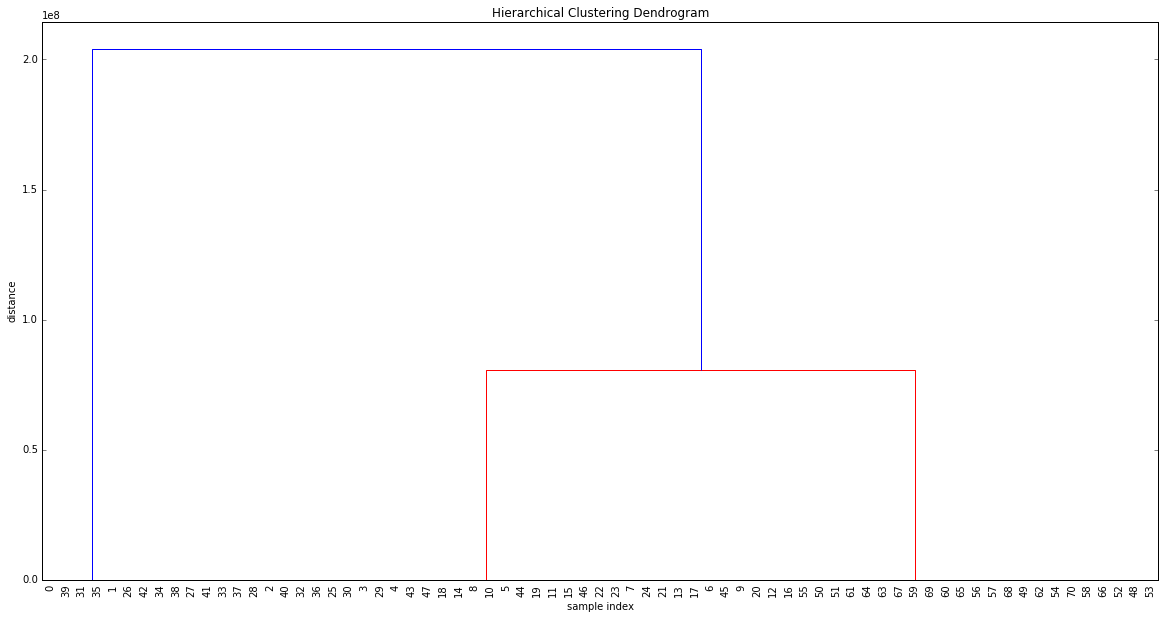

In [90]:

# calculate full dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()

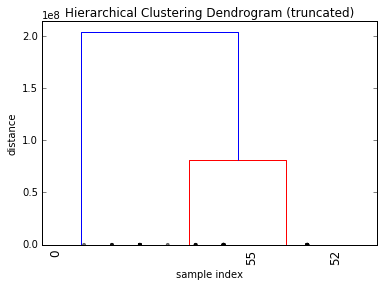

In [91]:
# truncating the dendrogram: 
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()